In [1]:
 import pandas as pd

C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\33152188.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import numpy as np


In [6]:

try:
    df = pd.read_csv("Telco-Customer-Churn.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")

Dataset loaded successfully!


In [7]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



Distribution of the 'Churn' variable:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\979907071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


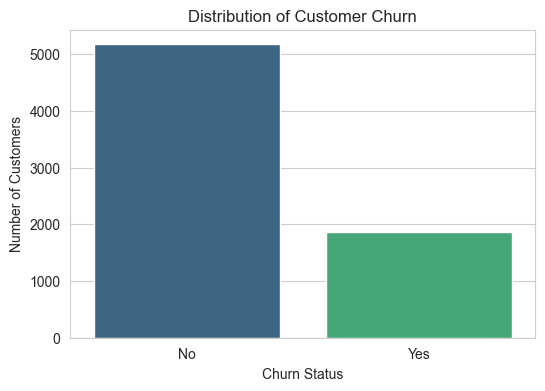


Percentage of Churn:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [9]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Check the distribution of the 'Churn' column
print("\nDistribution of the 'Churn' variable:")
print(df['Churn'].value_counts())

# Visualize the distribution of 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

# Calculate the percentage of churn
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("\nPercentage of Churn:")
print(churn_percentage)

In [12]:
df['TotalCharges'].dtype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [19]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [17]:
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

In [20]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"\nCategorical Columns identified: {categorical_cols}")


Categorical Columns identified: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


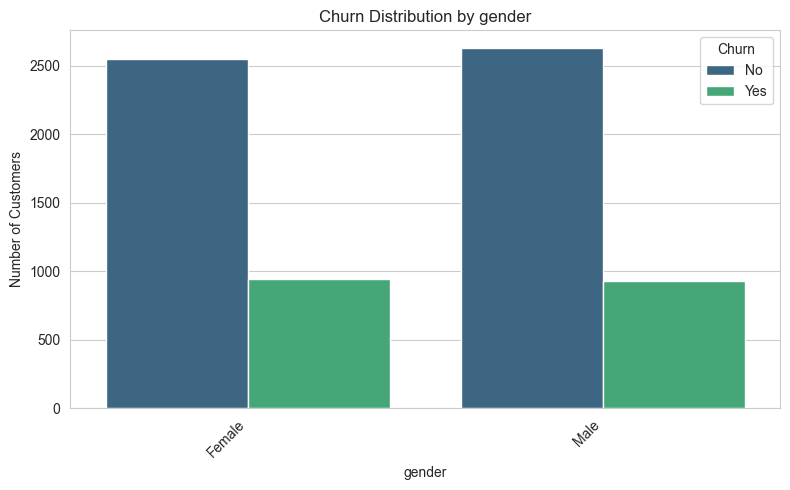


Value Counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------


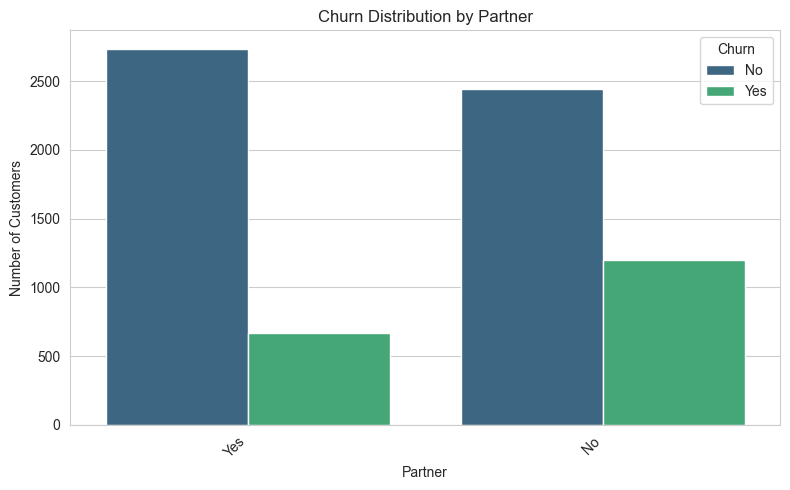


Value Counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------


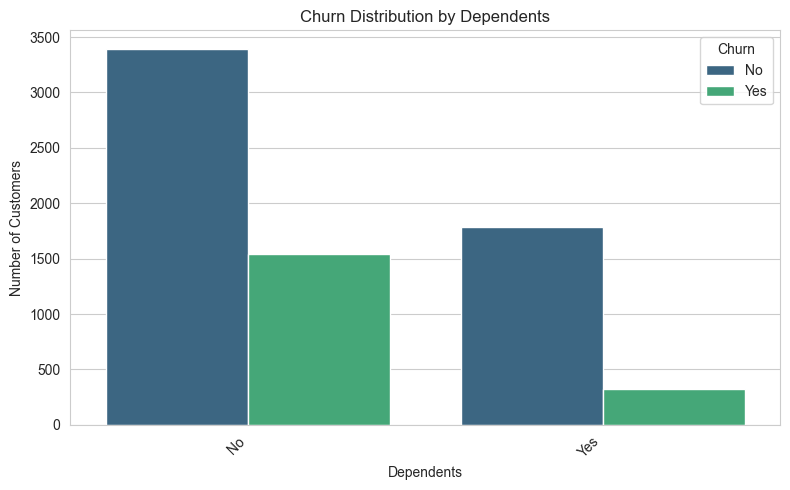


Value Counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------


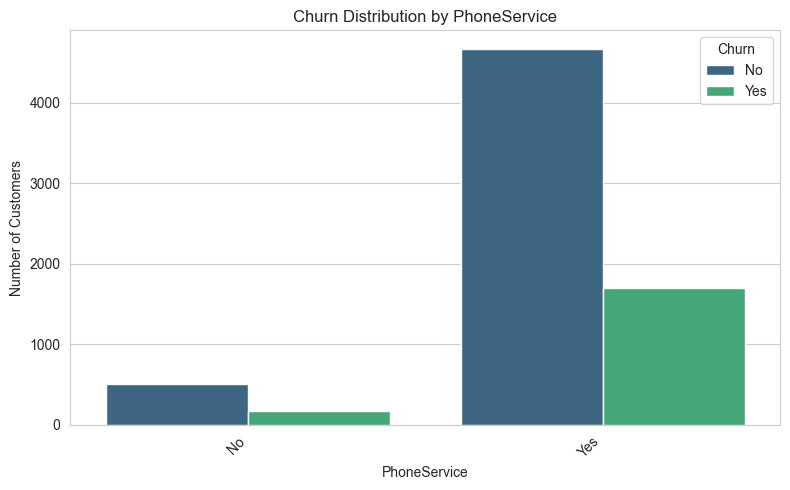


Value Counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------


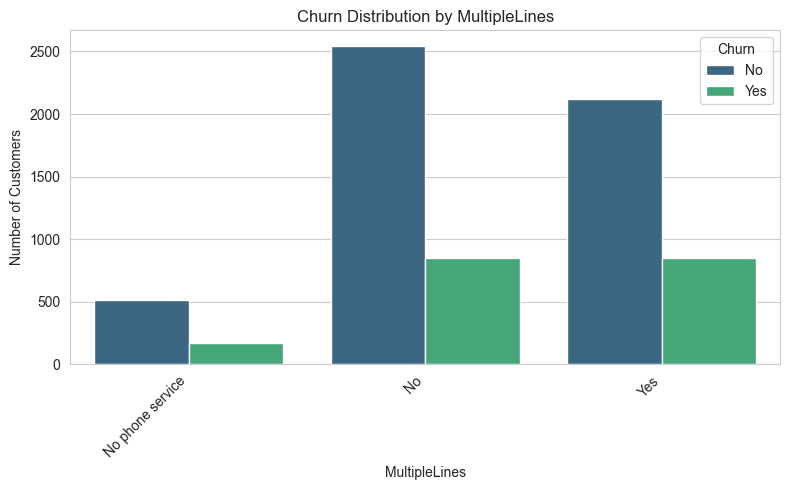


Value Counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------


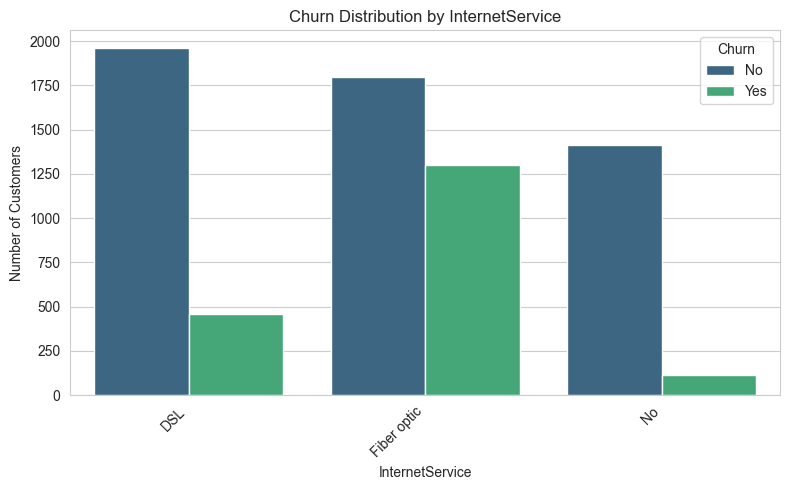


Value Counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------


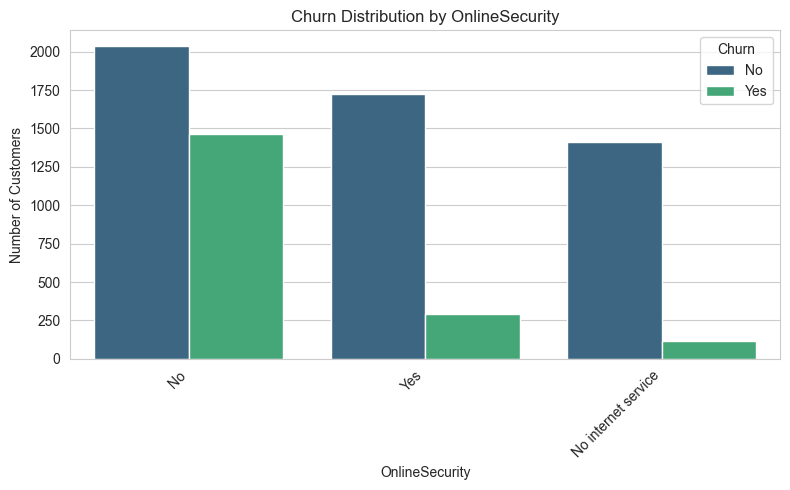


Value Counts for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------


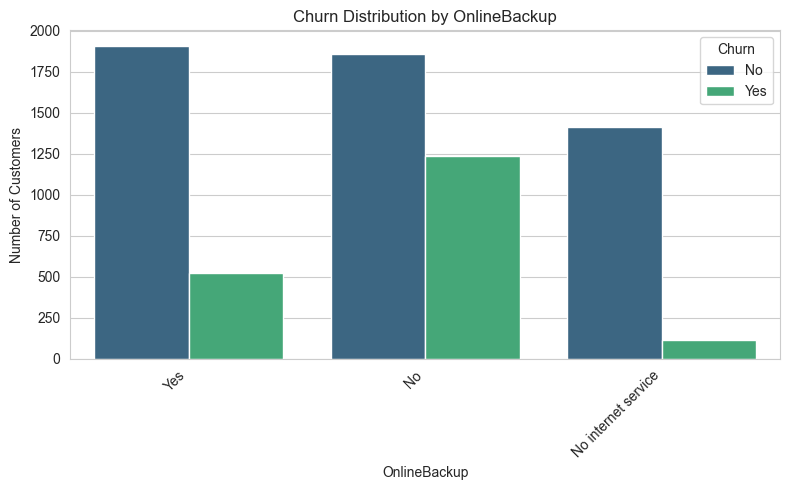


Value Counts for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------


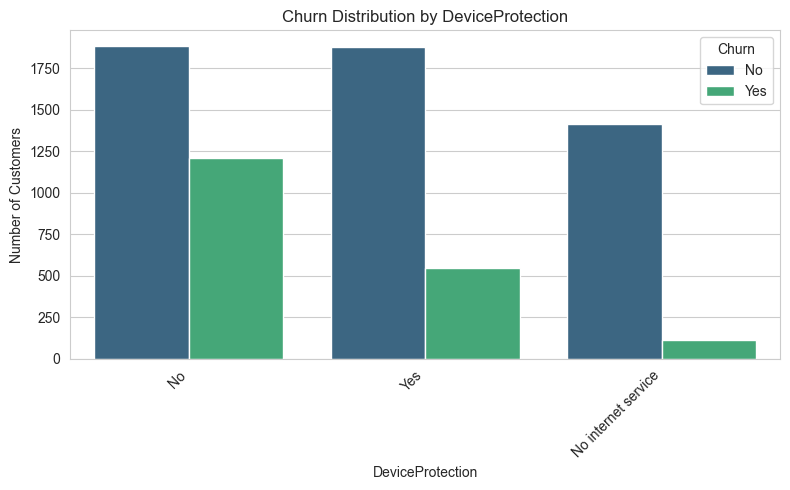


Value Counts for DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------


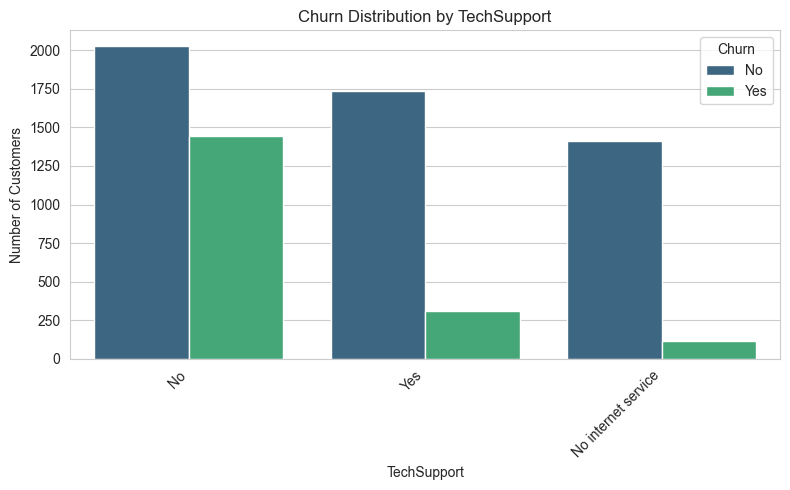


Value Counts for TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
------------------------------


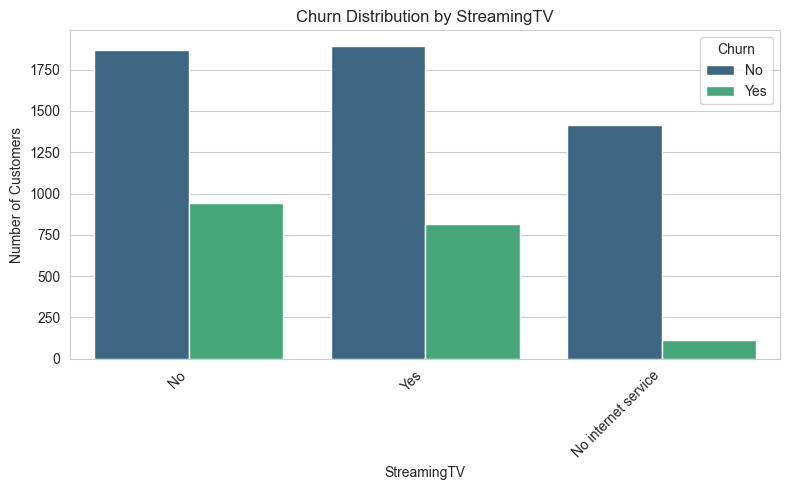


Value Counts for StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
------------------------------


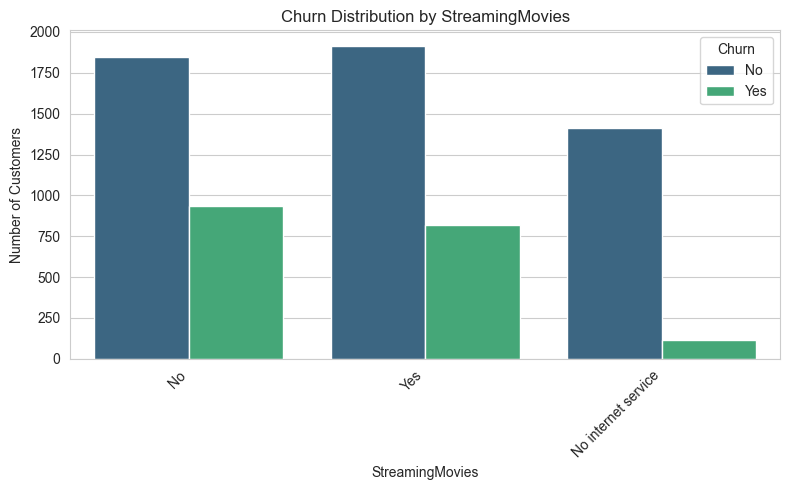


Value Counts for StreamingMovies:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
------------------------------


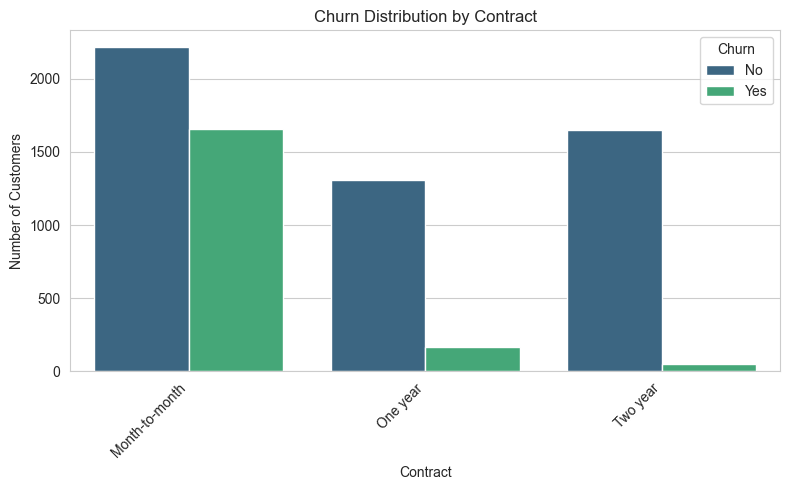


Value Counts for Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
------------------------------


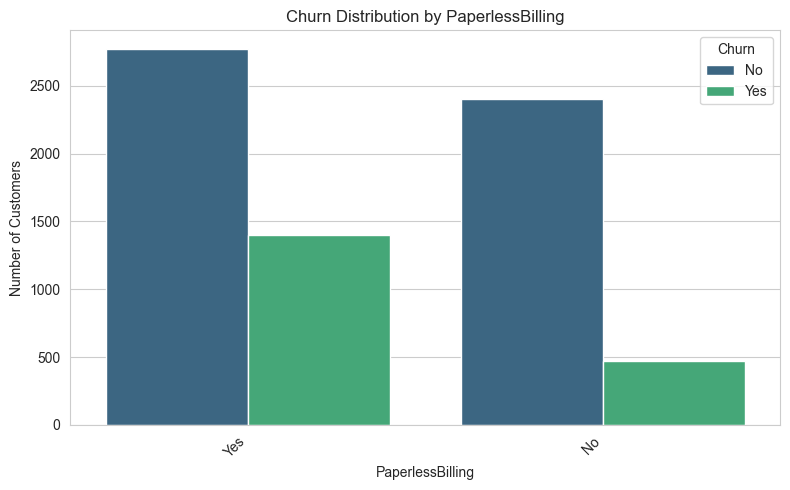


Value Counts for PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
------------------------------


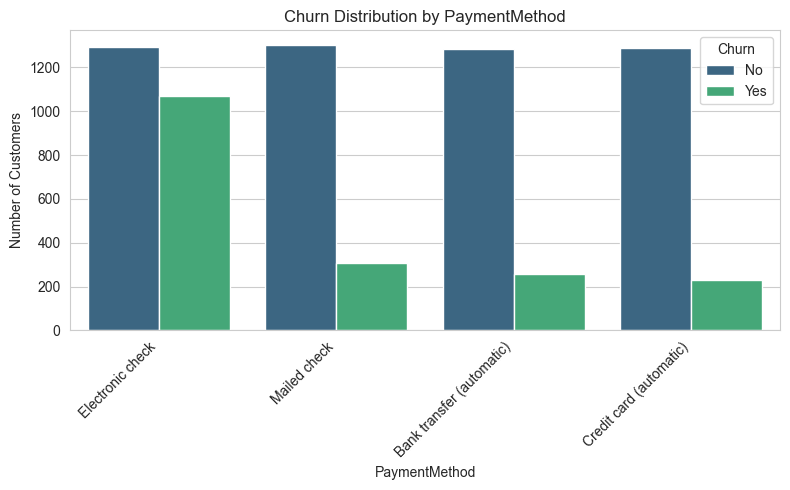


Value Counts for PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
------------------------------


In [21]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many categories
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    # Also print value counts for quick inspection
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    print("-" * 30)


Numerical Columns identified: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette='viridis')
C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


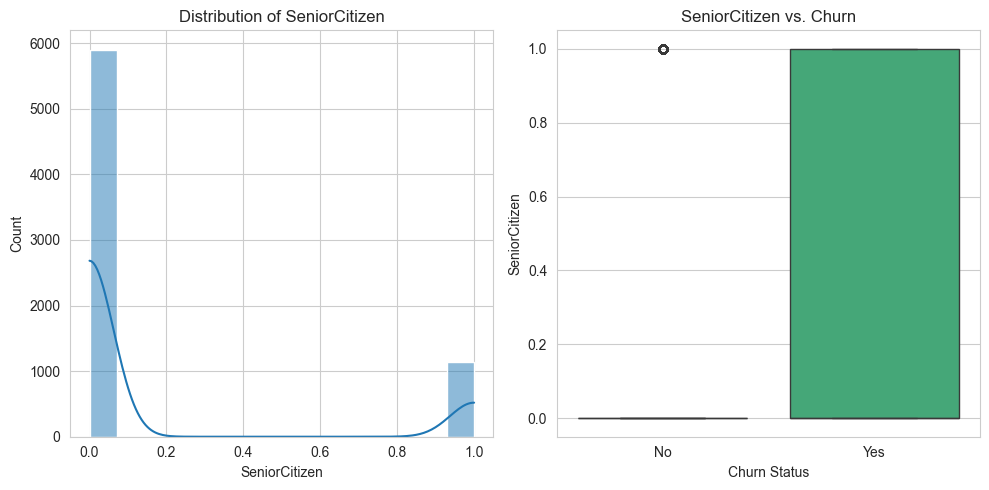

C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette='viridis')
C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


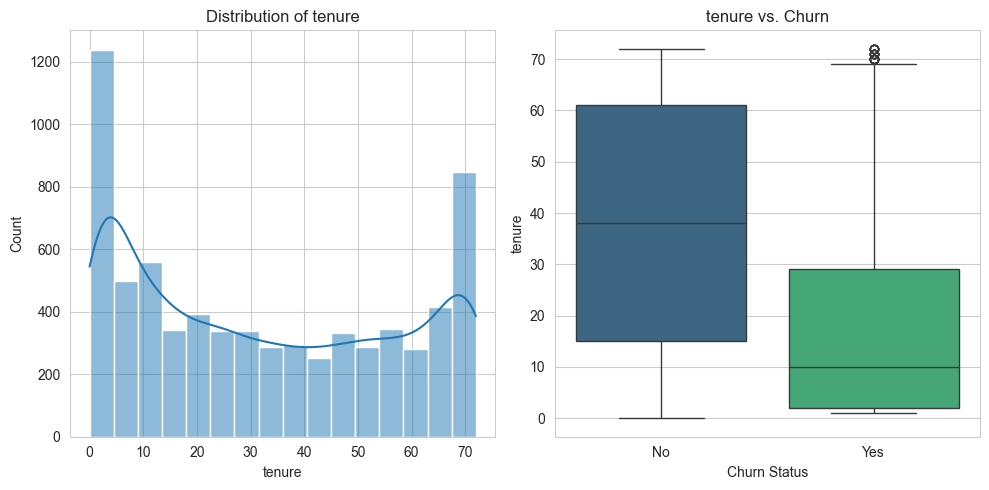

C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette='viridis')
C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


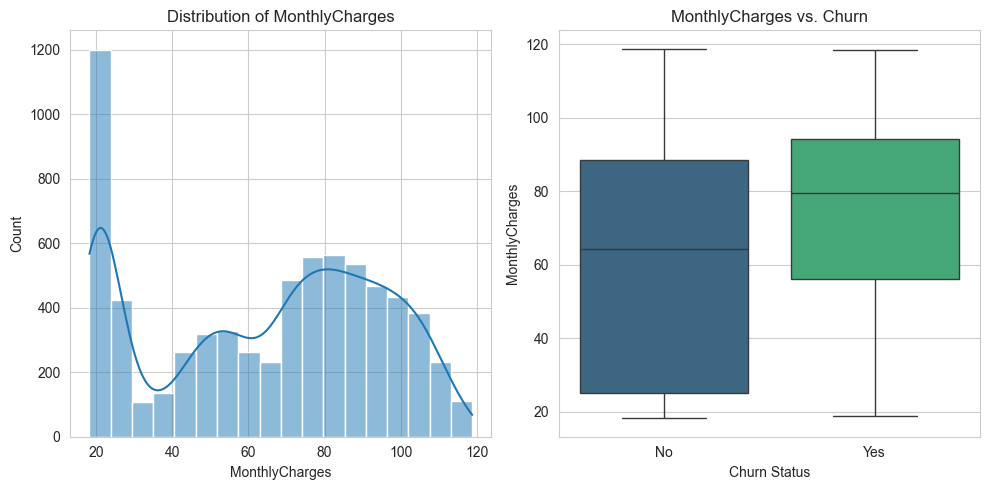

C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette='viridis')
C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\80082612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='viridis')


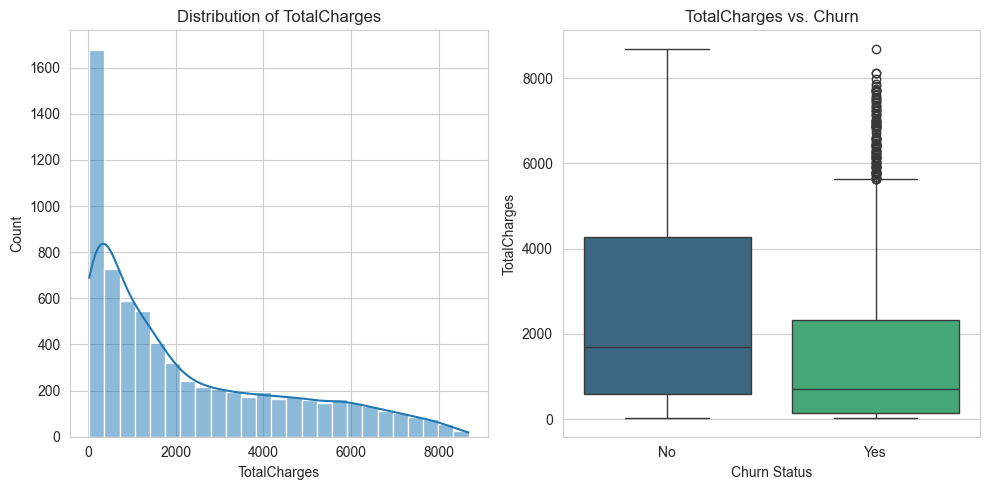


Correlation Matrix of Numerical Features:


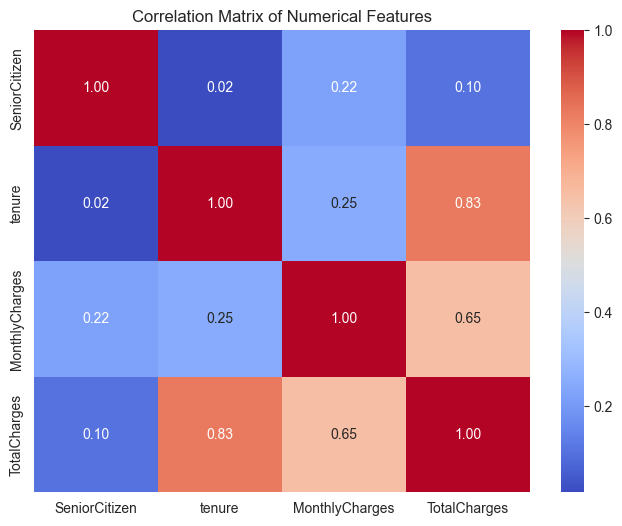


Correlation of Numerical Features with Churn:
Churn_numeric     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199037
tenure           -0.352229
Name: Churn_numeric, dtype: float64


In [24]:
# Identify numerical columns (excluding 'customerID')
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
if 'customerID' in numerical_cols:
    numerical_cols.remove('customerID')

print(f"\nNumerical Columns identified: {numerical_cols}")

# Loop through each numerical column and visualize its distribution
for col in numerical_cols:
    plt.figure(figsize=(10, 5))

    # Distribution of the numerical feature
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df[col], kde=True, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Box plot to see relationship with Churn
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(x='Churn', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Churn Status')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# Correlation Matrix for numerical features
print("\nCorrelation Matrix of Numerical Features:")
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation of numerical features with 'Churn' (after converting Churn to numeric)
# For correlation, 'Yes' needs to be 1 and 'No' needs to be 0
df_encoded_churn = df.copy()
df_encoded_churn['Churn_numeric'] = df_encoded_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print("\nCorrelation of Numerical Features with Churn:")
print(df_encoded_churn[numerical_cols + ['Churn_numeric']].corr()['Churn_numeric'].sort_values(ascending=False))

In [25]:
# Drop the 'customerID' column as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)
print("\n'customerID' column dropped.")
print(f"New DataFrame Shape: {df.shape[0]} rows, {df.shape[1]} columns")


'customerID' column dropped.
New DataFrame Shape: 7043 rows, 20 columns


In [26]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
# 'Churn' is our target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# --- 1. Encode Binary Categorical Features using LabelEncoder ---
# Identify binary columns (excluding 'customerID' which is already dropped)
binary_cols = []
for col in X.columns:
    if X[col].dtype == 'object' and len(X[col].unique()) == 2:
        binary_cols.append(col)

print(f"\nBinary Categorical Columns to encode: {binary_cols}")

for col in binary_cols:
    le = LabelEncoder()
    # Fit and transform the column
    X[col] = le.fit_transform(X[col])
    print(f"Column '{col}' encoded. Unique values: {X[col].unique()}")

# --- 2. Encode Multi-Category Nominal Features using One-Hot Encoding ---
# Identify remaining categorical columns (after binary encoding)
# These are still 'object' dtype and have more than 2 unique values
nominal_cols = X.select_dtypes(include='object').columns.tolist()

print(f"\nMulti-Category Nominal Columns to One-Hot Encode: {nominal_cols}")

# Apply One-Hot Encoding
X = pd.get_dummies(X, columns=nominal_cols, drop_first=True) # drop_first=True avoids multicollinearity

print("\nFeatures after encoding:")
print(X.head())
print(f"New X Shape: {X.shape[0]} rows, {X.shape[1]} columns")

# --- 3. Encode the Target Variable 'y' (Churn) ---
# 'Yes' to 1, 'No' to 0
y = y.apply(lambda x: 1 if x == 'Yes' else 0)
print("\nTarget variable 'y' encoded:")
print(y.head())
print(f"New y Shape: {y.shape[0]} rows")


Binary Categorical Columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
Column 'gender' encoded. Unique values: [0 1]
Column 'Partner' encoded. Unique values: [1 0]
Column 'Dependents' encoded. Unique values: [0 1]
Column 'PhoneService' encoded. Unique values: [0 1]
Column 'PaperlessBilling' encoded. Unique values: [1 0]

Multi-Category Nominal Columns to One-Hot Encode: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Features after encoding:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0    

In [27]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns that need scaling (these are the original numerical columns)
# Exclude any binary features that were already encoded to 0/1
# The one-hot encoded columns are already binary (0/1) so they typically don't need scaling in this context
numerical_features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Ensure these columns exist in X after previous processing
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X.columns]

if numerical_features_to_scale:
    scaler = StandardScaler()
    X[numerical_features_to_scale] = scaler.fit_transform(X[numerical_features_to_scale])
    print("\nNumerical features scaled using StandardScaler:")
    print(X[numerical_features_to_scale].head())
else:
    print("\nNo numerical features found for scaling or already scaled.")

print("\nFirst 5 rows of X after all preprocessing:")
print(X.head())


Numerical features scaled using StandardScaler:
     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470

First 5 rows of X after all preprocessing:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1       -1.160323     -0.994242   
1                 0       -0.259629     -0.173244   
2                 1       -0.362660     -0.959674   
3   

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train, y_train are used for training the model
# X_test, y_test are used for evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Verify the distribution of churn in training and test sets (important due to 'stratify')
print("\nChurn distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nChurn distribution in y_test:")
print(y_test.value_counts(normalize=True))

X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)

Churn distribution in y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# --- Option 1: Logistic Regression (Good Baseline) ---
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Model trained.")

# --- Option 2: Decision Tree Classifier ---
print("\n--- Training Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree Model trained.")

# --- Option 3: Random Forest Classifier (Recommended for this project) ---
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# n_estimators: number of trees in the forest (100 is a good starting point)
# class_weight='balanced': This is IMPORTANT for imbalanced datasets!
# It automatically adjusts weights inversely proportional to class frequencies,
# giving more importance to the minority class (churners).
rf_model.fit(X_train, y_train)
print("Random Forest Model trained.")

# You can choose to proceed with one model for evaluation, e.g., rf_model
# For the next steps, we'll use rf_model


--- Training Logistic Regression Model ---
Logistic Regression Model trained.

--- Training Decision Tree Classifier ---
Decision Tree Model trained.

--- Training Random Forest Classifier ---
Random Forest Model trained.


In [32]:
# Make predictions on the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("\nPredictions made using Random Forest model.")

# You can also get prediction probabilities (useful for ROC AUC)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class (churn=1)
print("\nPrediction probabilities obtained using Random Forest model.")

# You can uncomment and run these if you want to test other models later
 #y_pred_lr = log_reg_model.predict(X_test)
 #y_pred_dt = dt_model.predict(X_test)


Predictions made using Random Forest model.

Prediction probabilities obtained using Random Forest model.



--- Model Evaluation: Random Forest Classifier ---
Accuracy: 0.7850
Precision (for Churn=1): 0.6272
Recall (for Churn=1): 0.4679
F1-Score (for Churn=1): 0.5360
ROC AUC Score: 0.8250

Confusion Matrix:
[[931 104]
 [199 175]]


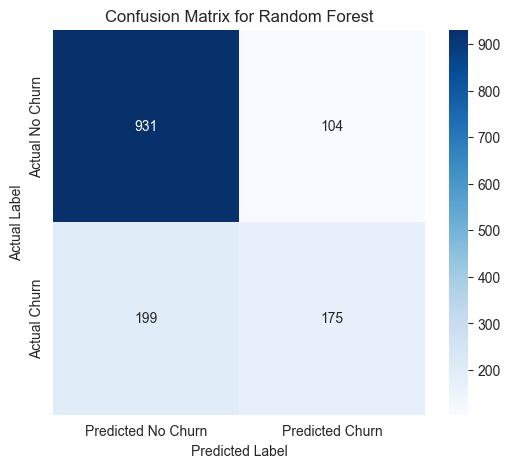


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.90      0.86      1035
       Churn       0.63      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# We'll evaluate the Random Forest model (rf_model)
# y_test are the true labels, y_pred_rf are the model's predictions

print("\n--- Model Evaluation: Random Forest Classifier ---")

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision Score
precision = precision_score(y_test, y_pred_rf)
print(f"Precision (for Churn=1): {precision:.4f}")

# 3. Recall Score
recall = recall_score(y_test, y_pred_rf)
print(f"Recall (for Churn=1): {recall:.4f}")

# 4. F1-Score
f1 = f1_score(y_test, y_pred_rf)
print(f"F1-Score (for Churn=1): {f1:.4f}")

# 5. ROC AUC Score
# y_pred_proba_rf was calculated in the previous step
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 7. Classification Report (combines precision, recall, f1-score for both classes)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))


Top 10 Feature Importances:
                           Feature  Importance
8                     TotalCharges    0.179593
4                           tenure    0.166425
7                   MonthlyCharges    0.149265
26               Contract_Two year    0.054062
11     InternetService_Fiber optic    0.042376
28  PaymentMethod_Electronic check    0.040704
25               Contract_One year    0.029331
0                           gender    0.026158
6                 PaperlessBilling    0.025067
14              OnlineSecurity_Yes    0.025059


C:\Users\pa350\AppData\Local\Temp\ipykernel_6104\3516778299.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


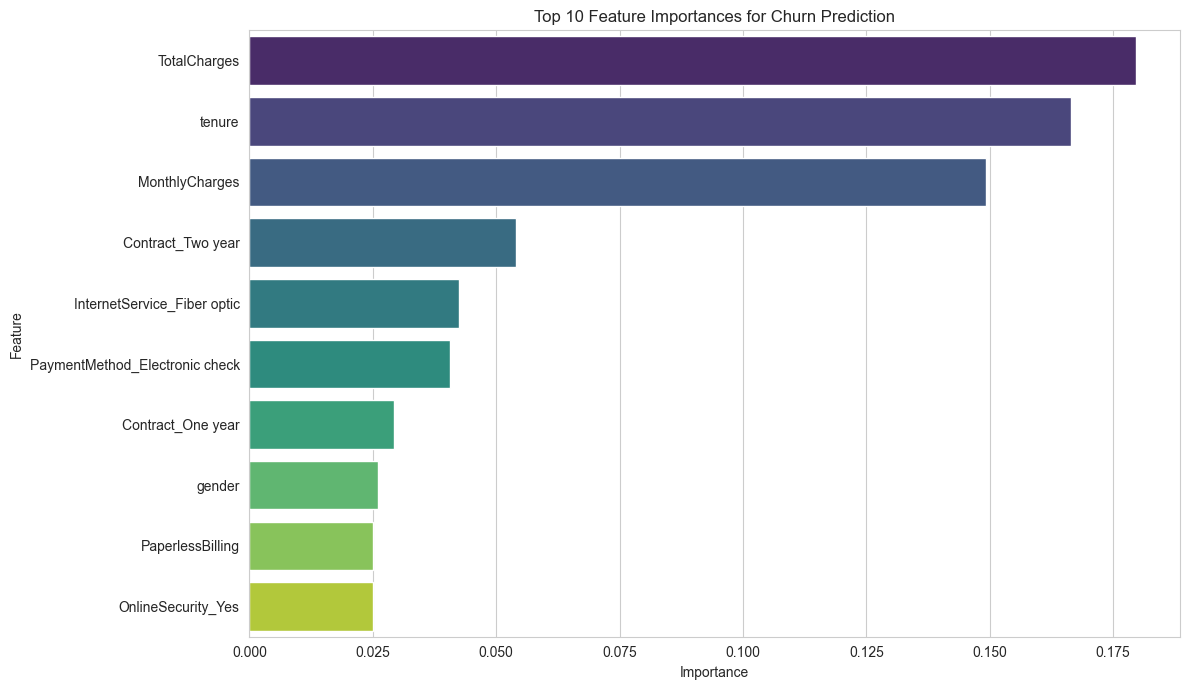

In [34]:
# Get feature importances from the trained Random Forest model

feature_importances = rf_model.feature_importances_



# Create a Series with feature names and their importances

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=False)



print("\nTop 10 Feature Importances:")

print(features_df.head(10))



# Visualize feature importances

plt.figure(figsize=(12, 7))

sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')

plt.title('Top 10 Feature Importances for Churn Prediction')

plt.xlabel('Importance')

plt.ylabel('Feature')

plt.tight_layout()

plt.show()